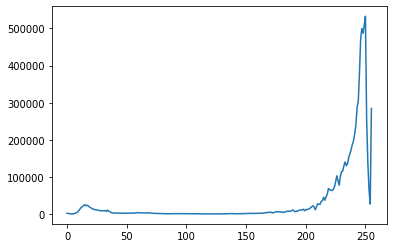

In [2]:
# importing required libraries of opencv
import cv2

# importing library for plotting
from matplotlib import pyplot as plt

# reads an input image
img = cv2.imread('01.jpeg',0)

# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])

# show the plotting graph of an image
plt.plot(histr)
plt.show()


[[100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.      ]
 [100.

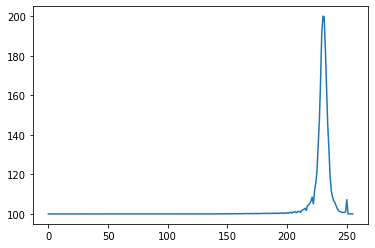

In [43]:
# importing required libraries of opencv
import cv2
import numpy as np
# importing library for plotting
from matplotlib import pyplot as plt

# dd = ["01.jpeg","02.jpeg","03.jpeg","04.jpeg","05.jpeg","06.jpeg","07.jpeg","10.jpeg","11.jpg","12.png","13.jpg", "14.jpg","15.jpg"]
dd=["25s.png"]
# reads an input image
x=cv2.imread(dd[0]);

# for i in range(0,x.shape[0]):
#     for j in range(0,x.shape[1]):
#         if(x[i][j][0]<=50 and x[i][j][1]<=50 and x[i][j][2]<=50):
#             print(x[i][j]);
for ig in dd:
    output= cv2.imread(ig,0);
#     output = cv2.medianBlur(output,5)
#     kernel = np.ones((5,5),np.uint8)
#     output = cv2.morphologyEx(output, cv2.MORPH_OPEN, kernel)
#     output = cv2.adaptiveThreshold(output,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#                 cv2.THRESH_BINARY,11,2)
# # output = cv2.GaussianBlur(output,(5,5),0)
#     tm,output= cv2.threshold(output,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#     output=cv2.morphologyEx(output,cv2.MORPH_OPEN,kernel)
    histr = cv2.calcHist([output],[0],None,[256],[0,256])
    f=plt.figure();
    name= "histograms\hist"+ig;
    histr=histr/max(histr)*100;
    for i in range(0,256):
        if histr[i]!=max(histr):
            histr[i]+=100;
    print(histr);
    plt.plot(histr)
    scale_percent=30;
    #calculate the 50 percent of original dimensions
    width = int(output.shape[1] * scale_percent / 100)
    height = int(output.shape[0] * scale_percent / 100)

    # dsize
    dsize = (width, height)

    # resize image
    output = cv2.resize(output, dsize)
    # show image input vs output
#     cv2.imshow('image', output)

#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    
    filename = '01.jpg'
    cv2.imwrite(filename, output)
    plt.savefig(name, dpi=300, bbox_inches='tight')
    
# find frequency of pixels in range 0-255


# show the plotting graph of an image



In [8]:
import cv2
import os
import math
from matplotlib import pyplot as plt
import numpy as np

def meanCal(arr):
    sum1=0;
    n=0;
    for itr in range(0,256):
        sum1=sum1+arr[itr]*itr;
        n=n+arr[itr];
    return sum1/n;

def stdCal(arr,mean):
    std=0;
    n=0;
    for itr in range(0,256):
        std=std+arr[itr]*((mean-itr)*(mean-itr));
        n=n+arr[itr];
    std=std/n;
    std=math.sqrt(std);
    return std;

directoryName= "MOTA";
directory = os.listdir(directoryName)
r=len(directory)
for files in directory:
        f1=directoryName  + "\\"+ files;
        output = cv2.imread(f1,cv2.IMREAD_GRAYSCALE)
        histr = cv2.calcHist([output],[0],None,[256],[0,256])
    #     f=plt.figure();
        name= "histograms\hist"+files;
    #     plt.xlabel("X-axis")
    #     plt.ylabel("y-axis")
        m=meanCal(histr);
        st=stdCal(histr,m);
    #     str1 = str(m)+" "+str(st);
    #     plt.title(str1);
    #     plt.plot(histr)
        print(m);
        print(st);
    #     plt.savefig(name, dpi=300, bbox_inches='tight')
        d= m-(2.9*st);
        for i in range(0,output.shape[0]):
            for j in range(0,output.shape[1]):
                if output[i][j]<245:
                    output[i][j]=255
                else:
                    output[i][j]=0
        filename = "after\\"+"edit"+files
        cv2.imwrite(filename, output)
# output = cv2.medianBlur(output,5)
# kernel = np.ones((5,5),np.uint8)
# output = cv2.morphologyEx(output, cv2.MORPH_OPEN, kernel)
# output = cv2.adaptiveThreshold(output,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv2.THRESH_BINARY,11,2)
# # output = cv2.GaussianBlur(output,(5,5),0)
# tm,output= cv2.threshold(output,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# output=cv2.morphologyEx(output,cv2.MORPH_OPEN,kernel)

# scale_percent=30;
# #calculate the 50 percent of original dimensions
# width = int(output.shape[1] * scale_percent / 100)
# height = int(output.shape[0] * scale_percent / 100)

# # dsize
# dsize = (width, height)

# # resize image
# output2 = cv2.resize(output, dsize)

# show image input vs output
# cv2.imshow('image', output2)
  
# cv2.waitKey(0)
# cv2.destroyAllWindows()

[226.90579]
8.969192334475412
[229.38313]
8.248144230052363
